## Accuracy(정확도)
- 불균형한 레이블 값 분포에서 ML모델의 성능을 판단할 경우 적합한 방법이 아니다.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

tdf = pd.read_csv('titanic_train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [3]:
tdf=transform_features(tdf)
tdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [4]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion, '\n')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-Score: {3:.4f}'.format(accuracy , precision ,recall, f1))


In [5]:
y_tdf = tdf['Survived']
x_tdf = tdf.drop('Survived', axis=1)


x_train, x_test, y_train, y_test = train_test_split(x_tdf, y_tdf, test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver = 'liblinear')

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)


오차 행렬
[[108  10]
 [ 14  47]] 

정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1-Score: 0.7966


#### 과제_0914_1.
상기 오차행렬로 수작업으로 정확도, 정밀도, 재현율, F1_score 를 구하세요.

In [6]:
# 정확도
# 오차행렬
confusion = confusion_matrix( y_test, pred)
TN = confusion[0,0]
TP = confusion[1,1]
FN = confusion[1,0]
FP = confusion[0,1]

# 정확도 = (TN+TP)/(TP+TN+FN+FP)
accuracy = (TN+TP)/(TP+TN+FN+FP)
# 정밀도 = TP/(FP+TP)
precision =TP/(FP+TP)
# 재현율 = TP/(FN+TP)
recall = TP/(FN+TP)
# F1-score = 2*precision*recall/(precision+recall)
F1_score = 2*precision*recall/(precision+recall)

print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1-Score : {3:.4f}'.format(accuracy,precision,recall,F1_score))

정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1-Score : 0.7966


#### 과제_0914_2.
Precision 과 Recall간의 Trade-off 관계를 시각화하여 설명하세요.(p 155~ 166 참조)

In [7]:
# 개별 데이터 예측확률 확인
# predict_proba 메서드 활용(개별 데이터 예측 확률 반환)

predict_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba() 결과 shape:',predict_proba.shape)
print('pred_proba array에서 앞 3개만 샘플로 추출\n',predict_proba[:3])

# 예측확률 array와 예측 결괏값 array를 병합해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([predict_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

# 첫번째 칼럼이 0값에 대한 예측 확률, 두번째 칼럼이 1값에 대한 예측확률
# 두 개의 확률 중, 임곗값(0.5)를 기준으로 더 큰 값을 predict 값으로 반환

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
 [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두 개의 class중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [8]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값
custom_threshold = 0.5

# predict_prob() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = predict_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]] 

정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1-Score: 0.7966


In [9]:
# 분류 결정 임곗값을 0.4로 낮춤
custom_threshold = 0.4

# predict_prob() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = predict_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

# 오차행렬을 분석해보면 임곗값을 낮추기 이전보다 FP의 값은 증가하고, FN의 값은 낮아졌다. 
# 이는 임곗값이 낮춰져서 예측확률의 범위가 넓어져 더 많은 Positive를 생성했다고 볼 수 있다.
# 그로 인해 FN값은 낮아지고 TP값은 높아져 재현율이 증가함을 확인
# 그에 반해 FP값은 높아지고 TP값이 높아져 정밀도가 하락함을 확인

오차 행렬
[[97 21]
 [11 50]] 

정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1-Score: 0.7576


In [10]:
# 임곗값을 변화시켜 결과 변화 확인
# 테스트 용 임곗값
thresholds = [0.4, 0.45,0.5,0.55,0.6]

def ger_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

ger_eval_by_threshold(y_test, predict_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]] 

정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1-Score: 0.7576

임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]] 

정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1-Score: 0.7869

임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]] 

정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1-Score: 0.7966

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]] 

정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1-Score: 0.7965

임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]] 

정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1-Score: 0.8000


In [11]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0,thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임곗값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임곗값별 정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임곗값별 재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


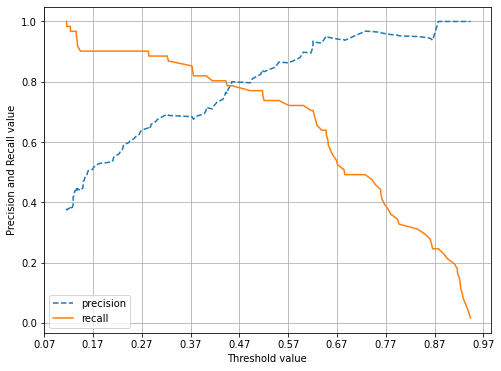

In [12]:
# 정밀도와 재현율의 임곗값에 따른 값의 변화, 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1단위로 변경
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

#### 과제_0914_3.
ROC Curve와 AUC를 시각화하여 의미를 설명하고 ROC, AUC 값을 구하세요.

In [13]:
# FRP, TPR, 임곗값 구하기
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:',np.round(thresholds[thr_index], 2))

# 5step 단위로 추출된 임곗값에 따른 FPR, TPR 값

print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


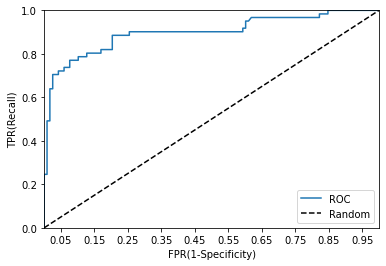

In [14]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y측 먕 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, predict_proba[:,1])

In [15]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))
# AUC는 ROC곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치, 
# AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
# 보통의 분류는 0.5 이상의 AUC 값을 갖는다.

ROC AUC 값: 0.8987


## 피마 인디언 당뇨병 예측
* 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
* 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생


[과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pdf = pd.read_csv('diabetes.csv')
print(pdf['Outcome'].value_counts())
pdf.head(10)
# 데이터 확인 시, 툭별한 전처리가 필요없어보인다.

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
# 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수
def get_clf_eval_roc(y_test , pred, pred_prob):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_prob)
    print('오차 행렬')
    print(confusion, '\n')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-Score: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))


In [67]:
x = pdf.iloc[:,:-1]
y = pdf.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba= lr_clf.predict_proba(x_test)[:,1]

get_clf_eval_roc(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]] 

정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1-Score: 0.6392, ROC_AUC: 0.8081


In [68]:
def ger_eval_by_thresholds(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:', custom_threshold)
        get_clf_eval_roc(y_test, custom_predict, pred_prob_c1)

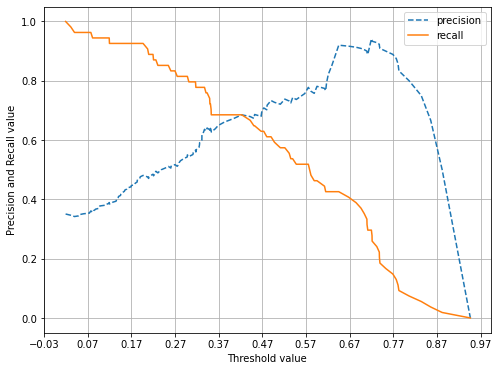

In [69]:
# 기형적으로 임계치 0.7 값에서 precision 값이 떨어진다.
pred_proba_c1 = lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [70]:
pdf.describe()
# min이 0값인 컬럼들이 다수 존재, 0값들의 분포율 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


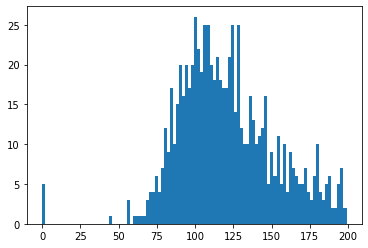

In [71]:
plt.hist(pdf['Glucose'], bins=100)
plt.show()
# 0값이 5개 정도 존재

In [72]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = pdf['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트를 계산
for feature in zero_features:
    zero_count = pdf[pdf[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))
# SkinThickness, Insulin은 0값이 많은 비율을 차지한다. 전체 데이터 건수가 많지 않아 이들 데이터를 일괄 삭제할 경우, 학습 수행에 장애가 있을 것으로 예상
# 위 피쳐 0값을 평균값으로 대체

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 0, 퍼센트는 0.00%
Insulin 0 건수는 0, 퍼센트는 0.00%
BMI 0 건수는 11, 퍼센트는 1.43%


In [73]:
# SkinThickness, Insulin의 0값 평균값으로 대체
mean_zero_feature = pdf[['SkinThickness','Insulin']].mean()
pdf[['SkinThickness','Insulin']] = pdf[['SkinThickness','Insulin']].replace(0, mean_zero_feature)

In [74]:
pdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
# 0 값을 평균값으로 대체한 데이터 세트에 피처스케일링을 적용해 변환
# 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음

x = pdf.iloc[:,:-1]
y = pdf.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba= lr_clf.predict_proba(x_test)[:,1]

get_clf_eval_roc(y_test, pred, pred_proba)

오차 행렬
[[89 11]
 [21 33]] 

정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111, F1-Score: 0.6735, ROC_AUC: 0.8083


In [81]:
def ger_eval_by_thresholds(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:', custom_threshold)
        get_clf_eval_roc(y_test, custom_predict, pred_proba_c1)

In [82]:
# 임계값 변화를 통해 재현율에 가중을 더할 임계치 개선
# 0.3에서 0.5까지 0.03씩 변화
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
pred_proba = lr_clf.predict_proba(x_test)

ger_eval_by_thresholds(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.3
오차 행렬
[[70 30]
 [13 41]] 

정확도: 0.7208, 정밀도: 0.5775, 재현율: 0.7593, F1-Score: 0.6560, ROC_AUC: 0.8083

임곗값: 0.33
오차 행렬
[[74 26]
 [15 39]] 

정확도: 0.7338, 정밀도: 0.6000, 재현율: 0.7222, F1-Score: 0.6555, ROC_AUC: 0.8083

임곗값: 0.36
오차 행렬
[[78 22]
 [18 36]] 

정확도: 0.7403, 정밀도: 0.6207, 재현율: 0.6667, F1-Score: 0.6429, ROC_AUC: 0.8083

임곗값: 0.39
오차 행렬
[[82 18]
 [20 34]] 

정확도: 0.7532, 정밀도: 0.6538, 재현율: 0.6296, F1-Score: 0.6415, ROC_AUC: 0.8083

임곗값: 0.42
오차 행렬
[[83 17]
 [20 34]] 

정확도: 0.7597, 정밀도: 0.6667, 재현율: 0.6296, F1-Score: 0.6476, ROC_AUC: 0.8083

임곗값: 0.45
오차 행렬
[[84 16]
 [20 34]] 

정확도: 0.7662, 정밀도: 0.6800, 재현율: 0.6296, F1-Score: 0.6538, ROC_AUC: 0.8083

임곗값: 0.48
오차 행렬
[[89 11]
 [20 34]] 

정확도: 0.7987, 정밀도: 0.7556, 재현율: 0.6296, F1-Score: 0.6869, ROC_AUC: 0.8083

임곗값: 0.5
오차 행렬
[[89 11]
 [21 33]] 

정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111, F1-Score: 0.6735, ROC_AUC: 0.8083


In [28]:
# 임곗값 : 0.48이 정밀도도 높게 가져가면서 재현율을 약간 조정해주는 값이다.
# 이를 Binarizer 클래스로 적용

binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval_roc(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[89 11]
 [20 34]] 

정확도: 0.7987, 정밀도: 0.7556, 재현율: 0.6296, F1-Score: 0.6869, ROC_AUC: 0.8083


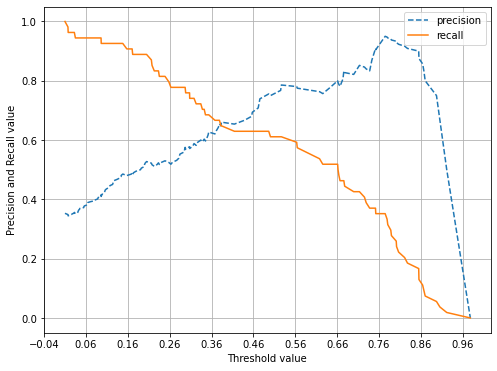

In [29]:
# 조정된 정밀도, 재현율 그래프
pred_proba_c2 = lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c2)
# 여전히 기형적, 모든 피처의 0값들을 평균으로 대체

In [30]:
mean_zero_feature = pdf[zero_features].mean()
pdf[zero_features] = pdf[zero_features].replace(0, mean_zero_feature)

In [31]:
pdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
# 0 값을 평균값으로 대체한 데이터 세트에 피처스케일링을 적용해 변환
# 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음

x = pdf.iloc[:,:-1]
y = pdf.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba= lr_clf.predict_proba(x_test)[:,1]

get_clf_eval_roc(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]] 

정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1-Score: 0.6804, ROC_AUC: 0.8433


In [33]:
# 임계값 변화를 통해 재현율에 가중을 더할 임계치 개선
# 0.3에서 0.5까지 0.03씩 변화
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
pred_proba = lr_clf.predict_proba(x_test)

ger_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]] 

정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1-Score: 0.6615

임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]] 

정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1-Score: 0.6774

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]] 

정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1-Score: 0.6667

임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]] 

정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1-Score: 0.6667

임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]] 

정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1-Score: 0.6792

임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]] 

정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1-Score: 0.6857

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]] 

정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1-Score: 0.6931

임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]] 

정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1-Score: 0.6804


In [34]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval_roc(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]] 

정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1-Score: 0.6931, ROC_AUC: 0.8433


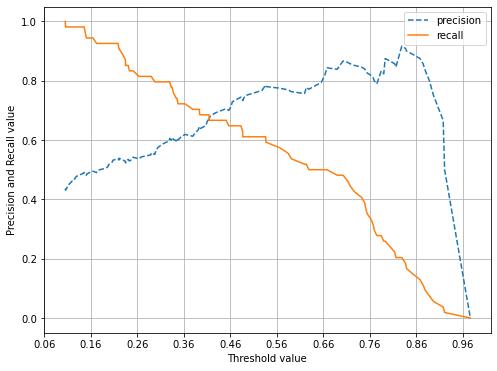

In [35]:
# 조정된 정밀도, 재현율 그래프
pred_proba_c3 = lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c3)